In [1]:
import generate_opinions

In [2]:
import generate_graphs

In [3]:
import visualize_graphs

In [4]:
comms = [50] * 4  #communities
intra_degree_seq = [15] * sum(comms)
inter_degree_seq = [1] * sum(comms)


In [5]:
from generate_graphs import generate_hierarchical_configuration_model

In [6]:
G = generate_hierarchical_configuration_model(intra_degree_seq, inter_degree_seq, comms)

In [7]:
from generate_opinions import assign_initial_opinions, basic_opinion_generator

In [10]:
from visualize_graphs import visualize_graph

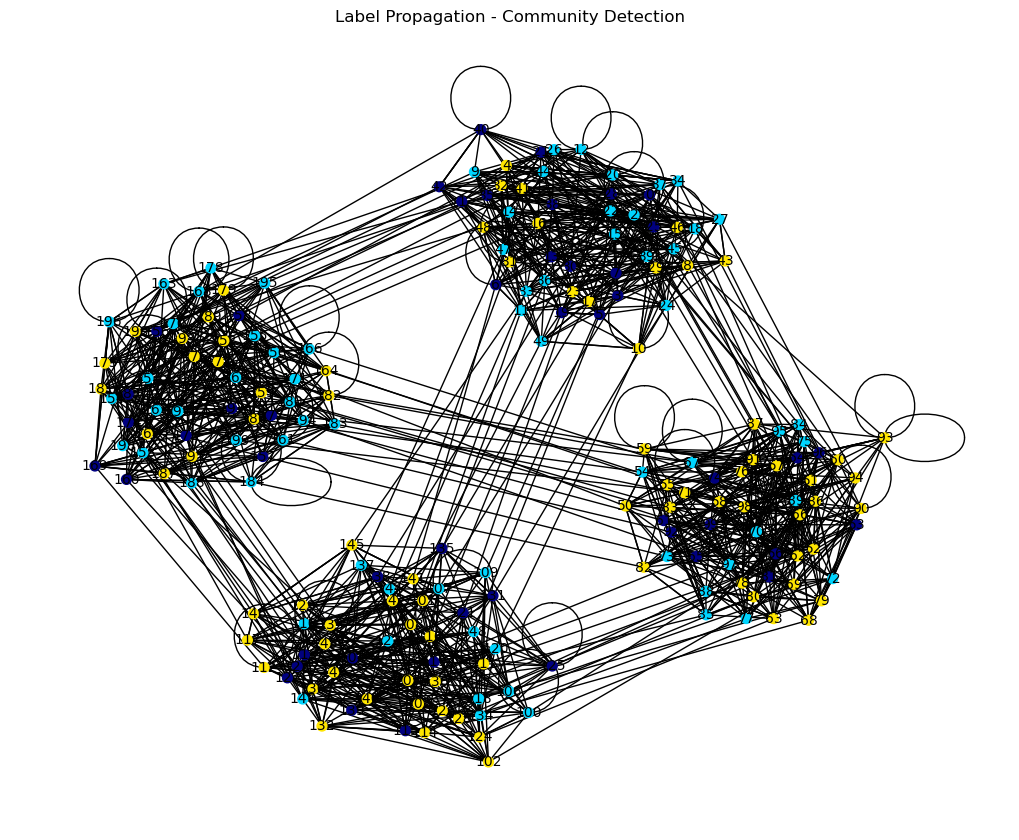

In [12]:
labels = assign_initial_opinions(G)
visualize_graph(G, labels)

Generating initial opinion distribution: 100%|██████████| 10000/10000 [00:00<00:00, 94294.92it/s]


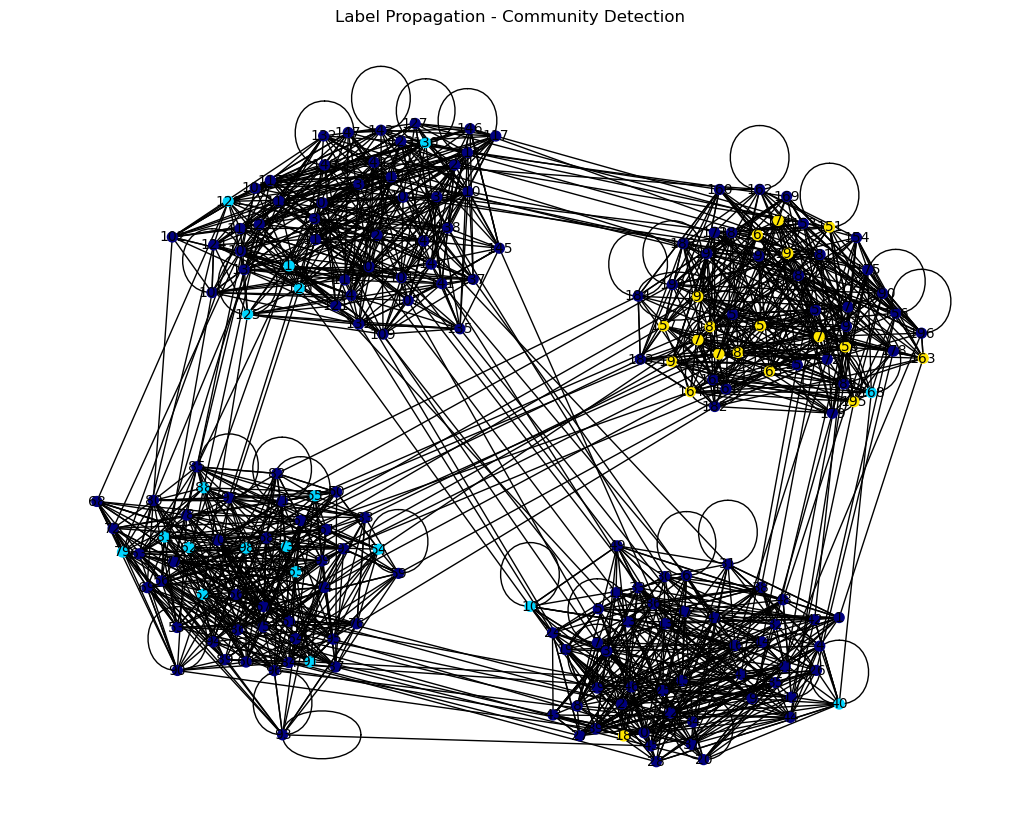

In [13]:
labels = basic_opinion_generator(G)
visualize_graph(G, labels)

Generating initial opinion distribution: 100%|██████████| 10000/10000 [00:00<00:00, 77172.96it/s]


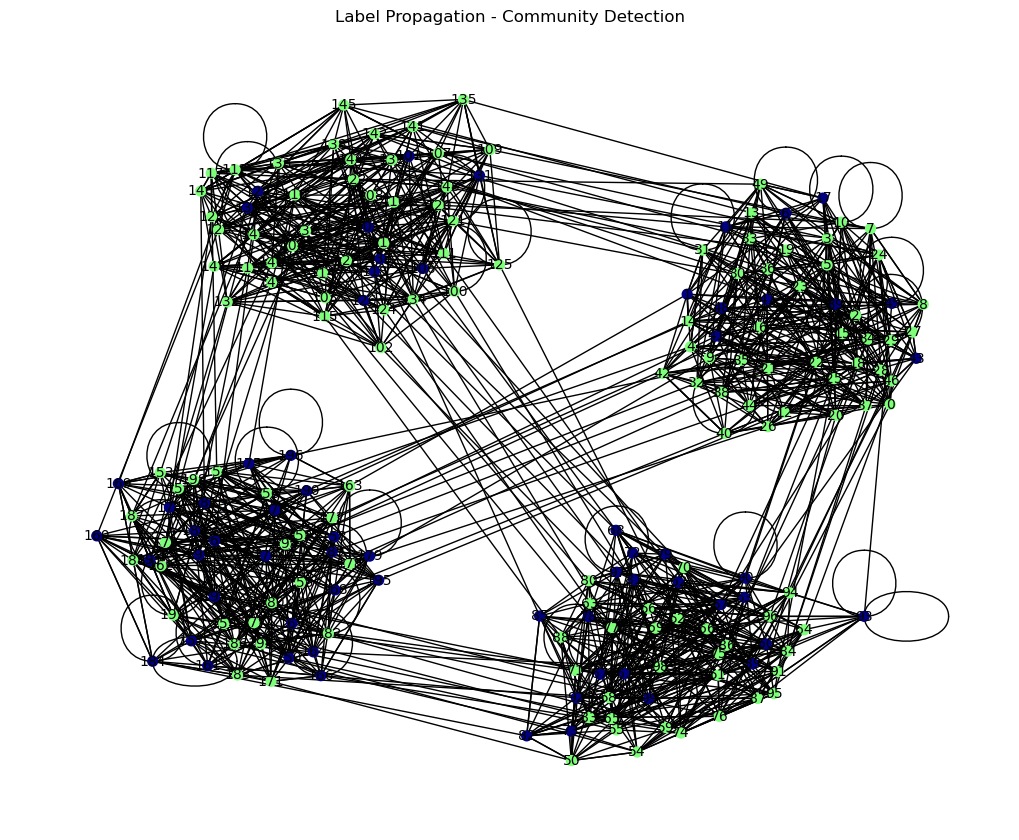

In [14]:
labels = basic_opinion_generator(G)
visualize_graph(G, labels)

In [1]:
from inference_models import *
from generate_opinions import *
from generate_graphs import *
from utils import *

num_nodes = 500
num_comm = 4
comms = [num_nodes] * num_comm  #communities
intra_degree_seq = [15] * sum(comms)
inter_degree_seq = [1] * sum(comms)
G = generate_sbm(comms, 0.75, 0.01)
#v = random.choice(G) # choose one single node
v = random.sample(list(G.nodes()), 100)  # choose a random set of nodes
r_values = [1]  # radius of the known ball

# ----------------------------------------------------
# Opinion generation
# ----------------------------------------------------
opinion_dist = OpinionDistribution(G)  # create instance of class OpinionDistribution with graph G
opinion_dist.initialize_opinions(states=[-1, 0, 1], probabilities=[0.4, 0.2, 0.4], label='opinion')
opinion_dist.basic_opinion_generator(label='opinion', num_steps=10000)
proportion_of_labels(nodes_per_comm=num_nodes, num_communities=num_comm, Graph=G, label='opinion')

SBM Graph: 2000 nodes, 389084 edges


Evolving initial attribute distribution: 100%|██████████| 10000/10000 [00:00<00:00, 12440.47it/s]

In community 0 the proportion of [1, -1, 0] 's is [0.378, 0.41, 0.212]
In community 1 the proportion of [-1, 1, 0] 's is [0.362, 0.352, 0.286]
In community 2 the proportion of [-1, 1, 0] 's is [0.278, 0.508, 0.214]
In community 3 the proportion of [-1, 1, 0] 's is [0.384, 0.474, 0.142]


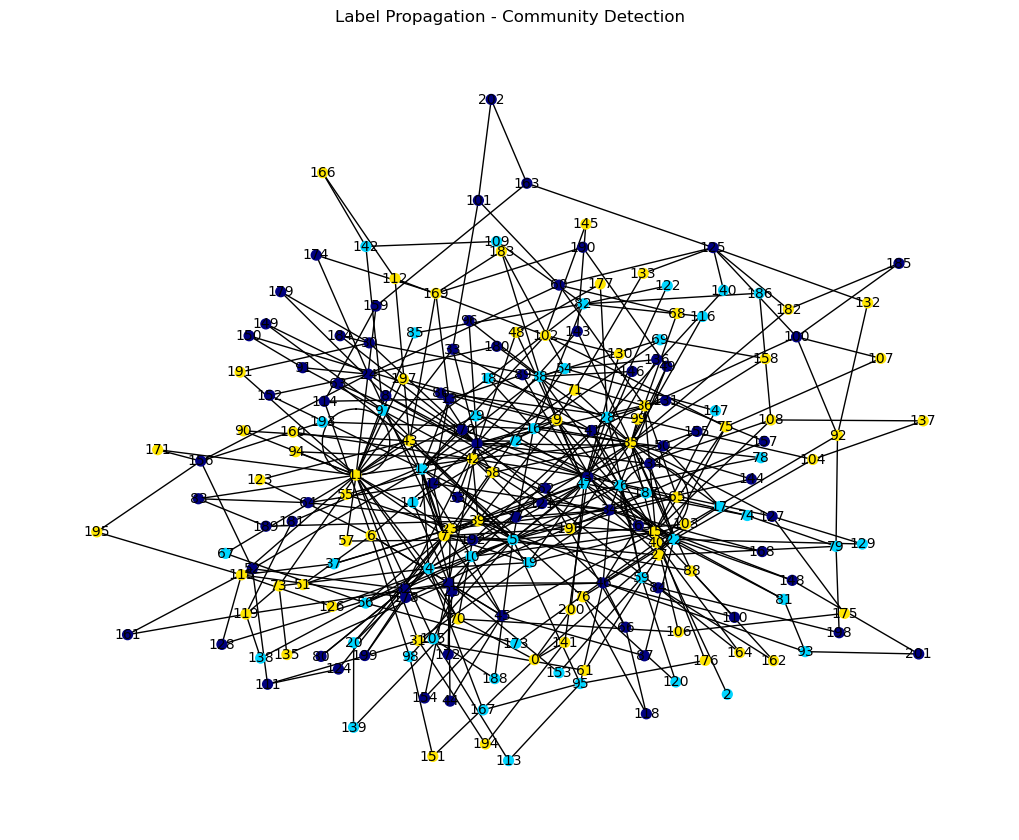

In [8]:
from inference_models import *
from generate_opinions import *
from generate_graphs import *
from utils import *
from visualize_graphs import *
# Visualize the graph with labels
import matplotlib.pyplot as plt

num_nodes = 200  # Number of nodes to add
num_edges = 2   # Number of edges for each new node
labels = {-1:2/5, 0:1/5, 1:2/5} # Initial labels for the small graph

graph = preferential_attachment_with_colors(num_nodes, num_edges, labels, size_init_graph=50, label='opinion', delta=0.1)
graph_labels={}
for node in graph.nodes:
    graph_labels[node] = graph.nodes[node]['opinion']
visualize_graph(graph, graph_labels)

In [2]:
degrees = nx.degree(graph)
degrees

DegreeView({0: 1, 1: 13, 2: 2, 3: 13, 4: 6, 5: 14, 6: 7, 7: 23, 8: 31, 9: 24, 10: 6, 11: 6, 12: 12, 13: 13, 14: 18, 15: 23, 16: 5, 17: 17, 18: 7, 19: 17, 20: 11, 21: 14, 22: 10, 23: 2, 24: 5, 25: 26, 26: 3, 27: 5, 28: 32, 29: 8, 30: 4, 31: 5, 32: 11, 33: 8, 34: 11, 35: 10, 36: 7, 37: 4, 38: 21, 39: 9, 40: 12, 41: 6, 42: 14, 43: 5, 44: 10, 45: 14, 46: 19, 47: 11, 48: 6, 49: 7, 50: 5, 51: 2, 52: 4, 53: 2, 54: 4, 55: 2, 56: 2, 57: 16, 58: 4, 59: 22, 60: 11, 61: 9, 62: 31, 63: 18, 64: 3, 65: 6, 66: 12, 67: 15, 68: 6, 69: 5, 70: 6, 71: 7, 72: 5, 73: 7, 74: 10, 75: 14, 76: 4, 77: 6, 78: 3, 79: 6, 80: 3, 81: 11, 82: 6, 83: 3, 84: 2, 85: 9, 86: 5, 87: 3, 88: 7, 89: 5, 90: 7, 91: 13, 92: 11, 93: 8, 94: 13, 95: 9, 96: 4, 97: 4, 98: 15, 99: 20, 100: 3, 101: 4, 102: 3, 103: 2, 104: 2, 105: 3, 106: 4, 107: 8, 108: 10, 109: 5, 110: 4, 111: 6, 112: 3, 113: 3, 114: 9, 115: 6, 116: 4, 117: 2, 118: 4, 119: 5, 120: 4, 121: 2, 122: 2, 123: 2, 124: 6, 125: 3, 126: 6, 127: 2, 128: 4, 129: 5, 130: 4, 131: 3,

In community 0 the proportion of [1, -1, 0] 's is [0.28, 0.37, 0.35]
In community 1 the proportion of [-1, 0, 1] 's is [0.49, 0.175, 0.335]
In community 2 the proportion of [1, 0, -1] 's is [0.31, 0.335, 0.355]


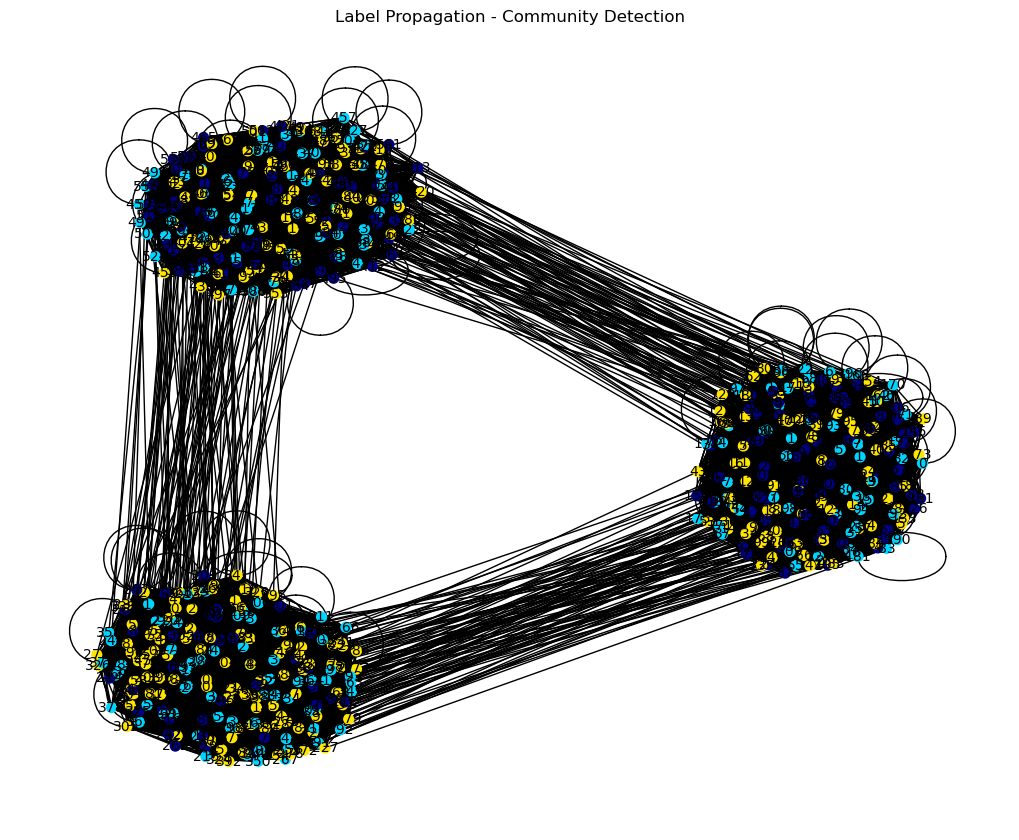

In [3]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from generate_graphs import *
from generate_opinions import *
from graph_statistics import *
from utils import *
from graph_inference import *
from visualize_graphs import *

num_nodes = 200
num_comm = 3
comms = [num_nodes] * num_comm  #communities
degree_intra = 50
degree_inter = 1
intra_degree_seq = [degree_intra] * sum(comms)
inter_degree_seq = [degree_inter] * sum(comms)

G = generate_hierarchical_configuration_model(ext_degree_sequence=inter_degree_seq, 
                                                in_degree_sequence=intra_degree_seq,
                                                community_sizes=comms)
opinion_dist = OpinionDistribution(G)  # create instance of class OpinionDistribution with graph G
opinion_dist.initialize_opinions(states=[-1, 0, 1], probabilities=[0.4, 0.2, 0.4], label='opinion')
opinion_dist.opinion_generator_biased_voter_model(label='opinion', num_iterations=10000, delta=0.1)
graph_inf = GraphInference(opinion_dist.graph)
proportion_of_labels(num_communities=num_comm, nodes_per_comm=num_nodes, Graph=G, label='opinion')
graph_labels={}
for node in G.nodes:
    graph_labels[node] = G.nodes[node]['opinion']
visualize_graph(G, graph_labels)

In community 0 the proportion of [-1, 1, 0] 's is [0.355, 0.605, 0.04]
In community 1 the proportion of [-1, 1, 0] 's is [0.4, 0.54, 0.06]
In community 2 the proportion of [0, -1, 1] 's is [0.84, 0.09, 0.07]


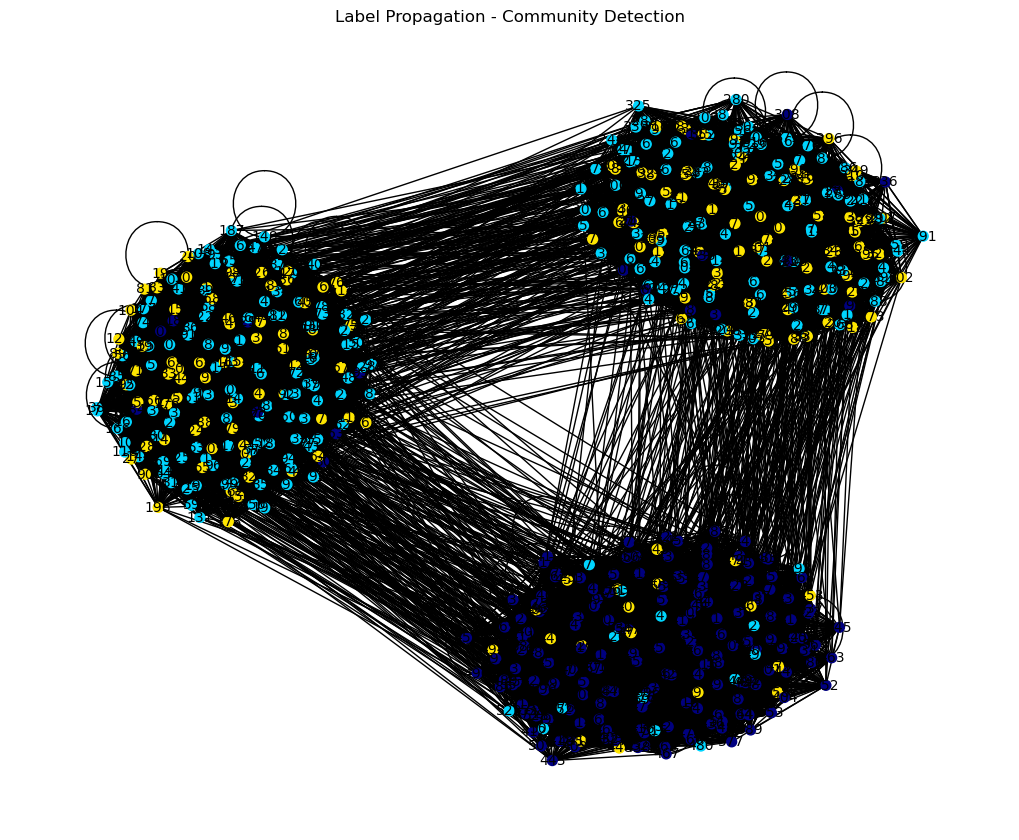

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from generate_graphs import *
from generate_opinions import *
from graph_statistics import *
from utils import *
from graph_inference import *
from visualize_graphs import *

num_nodes = 200
num_comm = 3
comms = [num_nodes] * num_comm  #communities
degree_intra = 50
degree_inter = 3
intra_degree_seq = [degree_intra] * sum(comms)
inter_degree_seq = [degree_inter] * sum(comms)

G = generate_hierarchical_configuration_model(ext_degree_sequence=inter_degree_seq, 
                                                in_degree_sequence=intra_degree_seq,
                                                community_sizes=comms)
opinion_dist = OpinionDistribution(G)  # create instance of class OpinionDistribution with graph G
opinion_dist.initialize_opinions(states=[-1, 0, 1], probabilities=[0.33, 0.33, 0.34], label='opinion')
opinion_dist.opinion_generator_majority_biased_voter_model(label='opinion', num_iterations=2000, delta=0.1)
graph_inf = GraphInference(opinion_dist.graph)
proportion_of_labels(num_communities=num_comm, nodes_per_comm=num_nodes, Graph=G, label='opinion')
graph_labels={}
for node in G.nodes:
    graph_labels[node] = G.nodes[node]['opinion']
visualize_graph(G, graph_labels)

Evolving initial attribute distribution: 100%|██████████| 10000/10000 [00:00<00:00, 66741.62it/s]


In community 0 the proportion of [1, -1, 0] 's is [0.515, 0.33, 0.155]
In community 1 the proportion of [1, -1, 0] 's is [0.425, 0.455, 0.12]
In community 2 the proportion of [1, 0, -1] 's is [0.62, 0.095, 0.285]


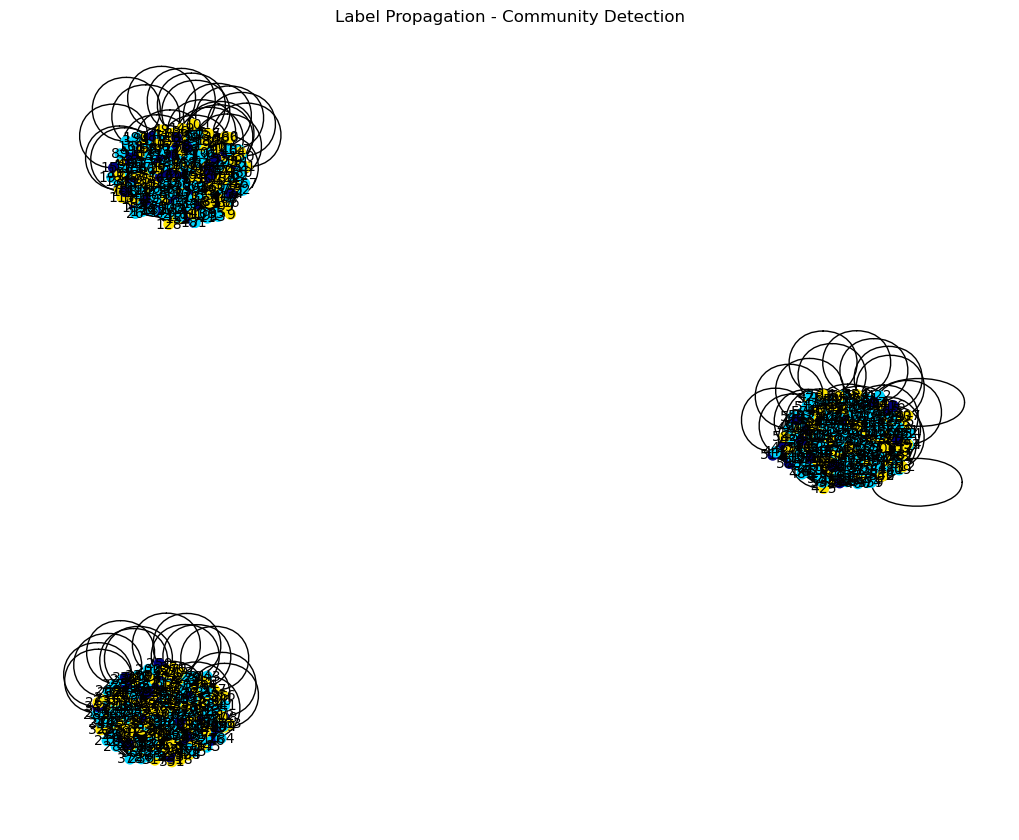

In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from generate_graphs import *
from generate_opinions import *
from graph_statistics import *
from utils import *
from graph_inference import *
from visualize_graphs import *

num_nodes = 200
num_comm = 3
comms = [num_nodes] * num_comm  #communities
degree_intra = 50
degree_inter = 1
intra_degree_seq = [degree_intra] * sum(comms)
inter_degree_seq = [degree_inter] * sum(comms)

G = generate_hierarchical_configuration_model(ext_degree_sequence=inter_degree_seq, 
                                                in_degree_sequence=intra_degree_seq,
                                                community_sizes=comms)
opinion_dist = OpinionDistribution(G)  # create instance of class OpinionDistribution with graph G
opinion_dist.initialize_opinions(states=[-1, 0, 1], probabilities=[0.4, 0.2, 0.4], label='opinion')
opinion_dist.basic_opinion_generator(label='opinion', num_steps=10000)
graph_inf = GraphInference(opinion_dist.graph)
proportion_of_labels(num_communities=num_comm, nodes_per_comm=num_nodes, Graph=G, label='opinion')
graph_labels={}
for node in G.nodes:
    graph_labels[node] = G.nodes[node]['opinion']
visualize_graph(G, graph_labels)